# Theory Questions and Answers

## 1. Explain the minimax loss function in GANs and how it ensures competitive training between the generator and discriminator.

The minimax loss function in GANs defines the adversarial relationship between the **generator (G)** and **discriminator (D)**.

- **Discriminator’s goal**: Correctly classify real and fake images. It maximizes log(D(x)) for real images and minimizes log(1 - D(G(z))) for fake images.
- **Generator’s goal**: Fool the discriminator by generating realistic images. It minimizes log(1 - D(G(z))).

This creates a competitive process where both networks improve over time.

---

## 2. What is mode collapse, why can it occur during GAN training, and how can it be mitigated?

### **What is mode collapse?**
Mode collapse happens when the generator produces only a few similar outputs instead of diverse images.

### **Why does it occur?**
- The generator finds a pattern that consistently fools the discriminator and keeps repeating it.
- The discriminator does not push the generator to produce diverse samples.

### **How to fix it?**
- Use **minibatch discrimination** to encourage diversity.
- Add **noise** to the training process.
- Use **Wasserstein GAN (WGAN)**, which provides a more stable loss function.

---

## 3. Explain the role of the discriminator in adversarial training.

The **discriminator** is a binary classifier that helps improve the generator by providing feedback.

- It takes **real images** from the dataset and **fake images** from the generator.
- It predicts **real (1)** or **fake (0)**.
- It helps guide the generator by improving its ability to create realistic images.

Over time, the generator learns to produce better images that can fool the discriminator.

---

## 4. How do metrics like IS and FID evaluate GAN performance?

### **Inception Score (IS)**
- Measures the **quality and diversity** of generated images.
- High IS means the model generates **clear and varied** images.


### **Fréchet Inception Distance (FID)**
- Measures the **distance between real and generated images**.
- Lower FID means **more realistic** generated images.
- FID compares the feature distributions of real and fake images using the **Inception model**.

IS focuses on individual images, while FID evaluates overall similarity to real data.


# Coding Assignment:


In [1]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [2]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Device being used:", tf.test.gpu_device_name())

# Ensure TensorFlow operations run on the GPU
tf.debugging.set_log_device_placement(True)


Num GPUs Available: 1
Device being used: /device:GPU:0


# 🚀 Generative Adversarial Network (GAN) on CIFAR-10

This project implements a **GAN** to generate images from the **CIFAR-10 dataset** using **mixed precision (`float16`)** for optimized GPU training.

---

## 📌 Overview
A **GAN consists of two neural networks**:
1. **Generator** 🏗️ – Creates **fake images** from random noise.
2. **Discriminator** 🔍 – Classifies images as **real or fake**.

These models **compete** in a **zero-sum game** until the generator produces **realistic-looking images**.

---

## 🏗️ **Model Architecture**
### **Generator**
- **Input**: 100-dimensional noise vector.
- **Layers**:
  - Dense layer reshaped to **(8×8×256)**
  - **3 Transposed Convolutions** for upsampling to **(32×32×3)**
  - **LeakyReLU + BatchNorm** for stability.
  - **Final `tanh` activation** to scale pixel values.

### **Discriminator**
- **Input**: (32×32×3) RGB image.
- **Layers**:
  - **2 Convolutional layers** (stride = 2, downsampling).
  - **LeakyReLU + Dropout** to prevent overfitting.
  - **Final Dense layer** (Binary classification).

---

## ⚙️ **Loss Functions**
- **Generator Loss**: Tries to fool the discriminator (**Binary Cross-Entropy**).
- **Discriminator Loss**:
  - Classifies **real images** with label **1**.
  - Classifies **fake images** with label **0**.

Both losses are **tracked and plotted** to monitor training progress.

---

## 🏃 **Training Pipeline**
1️⃣ **Preprocess Data** – CIFAR-10 images are **normalized** to `[-1, 1]`.  
2️⃣ **Train Generator & Discriminator** – Models learn **alternately** in each step.  
3️⃣ **Track Losses** – Losses are **stored and visualized** every **5 epochs**.  
4️⃣ **Generate Images** – Model **creates and displays synthetic images** every **25 epochs**.  

---

## 📊 **Loss Visualization**
The script tracks **generator and discriminator loss** over time.  
**Expected behavior**:
- **Generator loss decreases** as images improve.
- **Discriminator loss stabilizes**.




Epoch 1, Gen Loss: 0.6761, Disc Loss: 1.4637
Epoch 2, Gen Loss: 1.3918, Disc Loss: 0.9757
Epoch 3, Gen Loss: 1.9146, Disc Loss: 0.7525
Epoch 4, Gen Loss: 2.2670, Disc Loss: 0.7862
Epoch 5, Gen Loss: 1.4548, Disc Loss: 1.0894


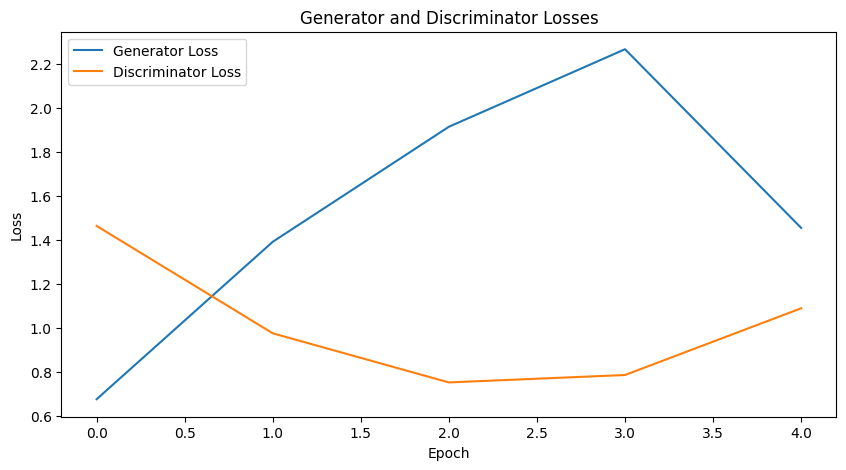

Epoch 6, Gen Loss: 0.8712, Disc Loss: 1.3013
Epoch 7, Gen Loss: 0.7577, Disc Loss: 1.2515
Epoch 8, Gen Loss: 0.8901, Disc Loss: 1.2078
Epoch 9, Gen Loss: 0.9155, Disc Loss: 1.1235
Epoch 10, Gen Loss: 0.9432, Disc Loss: 1.1460


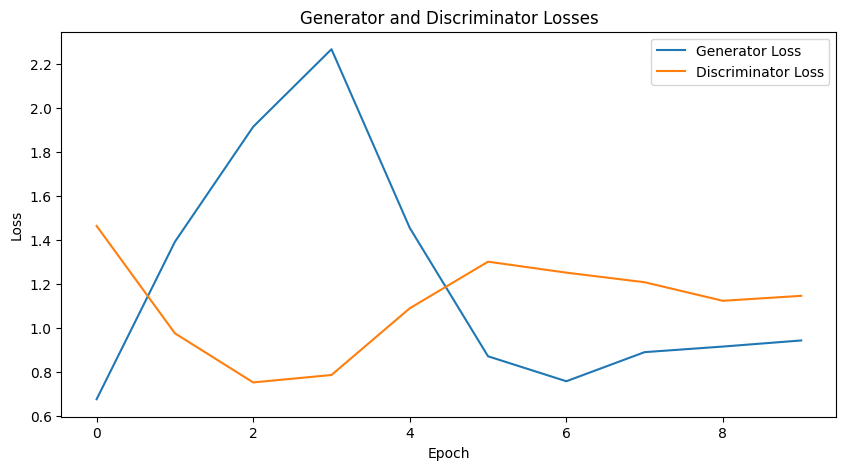

Epoch 11, Gen Loss: 0.9631, Disc Loss: 1.1178
Epoch 12, Gen Loss: 1.1825, Disc Loss: 0.9778
Epoch 13, Gen Loss: 1.1525, Disc Loss: 0.9662
Epoch 14, Gen Loss: 1.2946, Disc Loss: 0.9475
Epoch 15, Gen Loss: 1.3484, Disc Loss: 0.8790


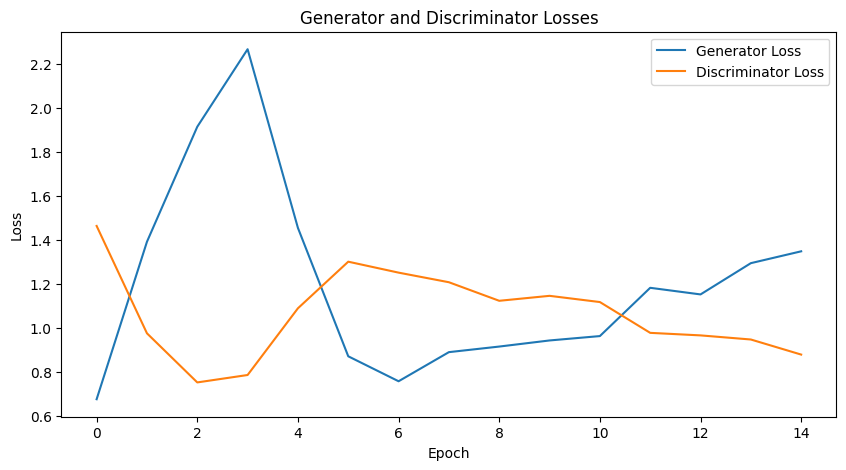

Epoch 16, Gen Loss: 1.5095, Disc Loss: 0.8624
Epoch 17, Gen Loss: 1.3132, Disc Loss: 0.9218
Epoch 18, Gen Loss: 1.3094, Disc Loss: 0.9324
Epoch 19, Gen Loss: 1.5702, Disc Loss: 0.9388
Epoch 20, Gen Loss: 1.3234, Disc Loss: 0.9957


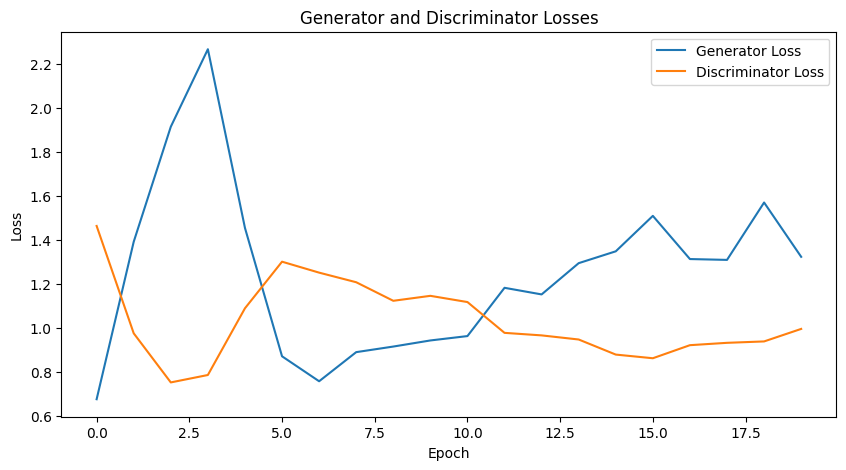

Epoch 21, Gen Loss: 1.0452, Disc Loss: 1.3408
Epoch 22, Gen Loss: 1.1076, Disc Loss: 1.0875
Epoch 23, Gen Loss: 1.2062, Disc Loss: 1.0948
Epoch 24, Gen Loss: 1.1062, Disc Loss: 1.1680
Epoch 25, Gen Loss: 1.3507, Disc Loss: 1.1086


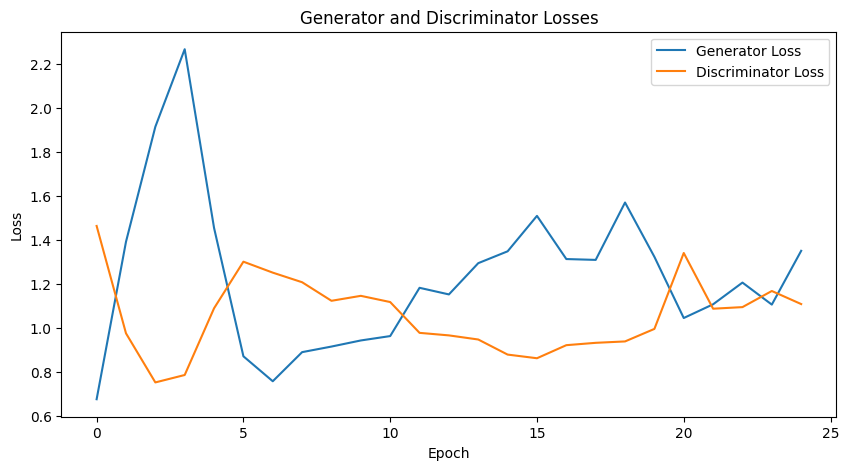

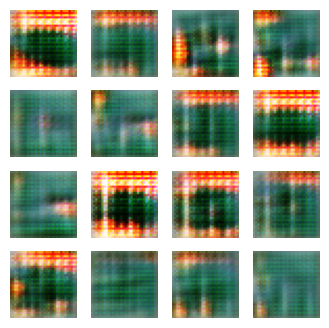

Epoch 26, Gen Loss: 1.2389, Disc Loss: 0.9929
Epoch 27, Gen Loss: 1.1082, Disc Loss: 1.1883
Epoch 28, Gen Loss: 1.1441, Disc Loss: 1.1254
Epoch 29, Gen Loss: 1.0433, Disc Loss: 1.1730
Epoch 30, Gen Loss: 1.4047, Disc Loss: 0.9644


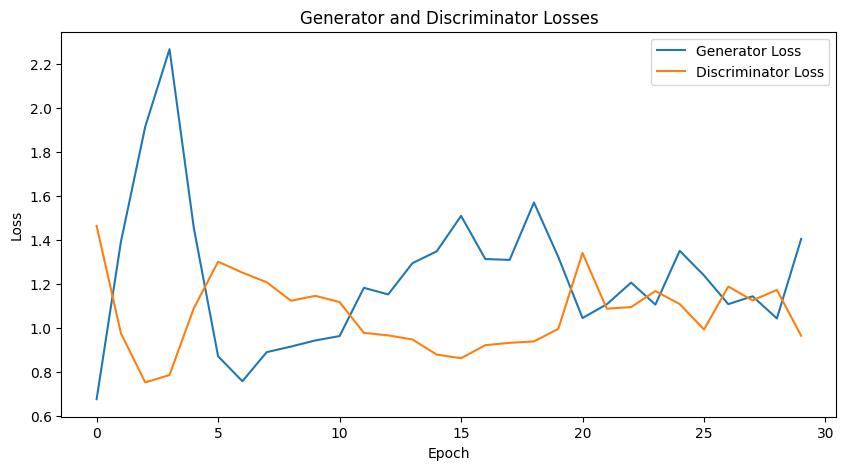

Epoch 31, Gen Loss: 1.3028, Disc Loss: 1.1898
Epoch 32, Gen Loss: 1.1586, Disc Loss: 1.1458
Epoch 33, Gen Loss: 1.2464, Disc Loss: 1.1130
Epoch 34, Gen Loss: 1.2756, Disc Loss: 1.2381
Epoch 35, Gen Loss: 1.1005, Disc Loss: 1.1403


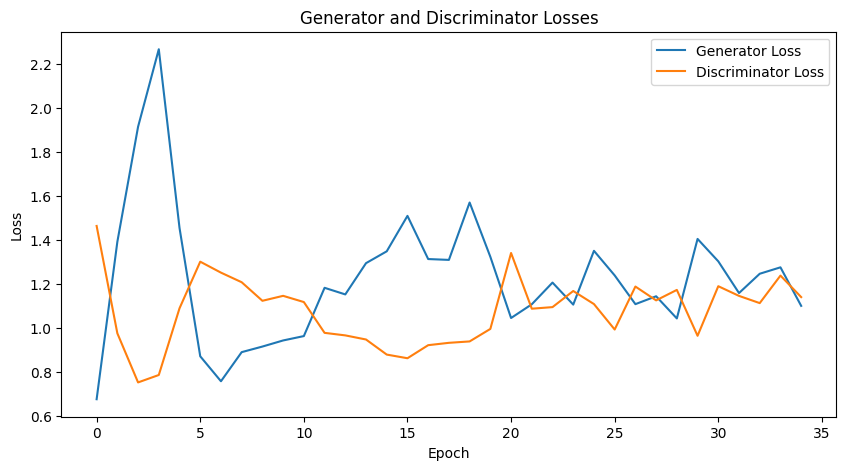

Epoch 36, Gen Loss: 1.1703, Disc Loss: 1.0996
Epoch 37, Gen Loss: 1.1735, Disc Loss: 0.9695
Epoch 38, Gen Loss: 1.1616, Disc Loss: 1.1371
Epoch 39, Gen Loss: 1.1014, Disc Loss: 1.0827
Epoch 40, Gen Loss: 1.6365, Disc Loss: 1.0473


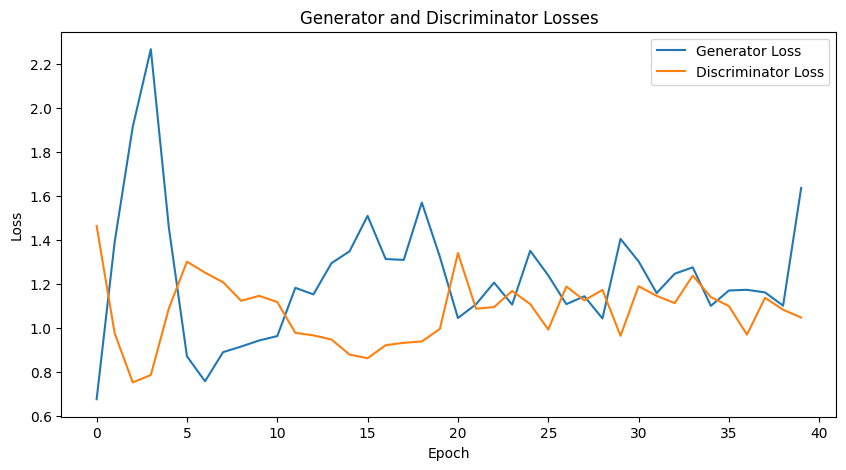

Epoch 41, Gen Loss: 1.3256, Disc Loss: 1.0960
Epoch 42, Gen Loss: 1.4217, Disc Loss: 0.9666
Epoch 43, Gen Loss: 1.2632, Disc Loss: 0.9476
Epoch 44, Gen Loss: 1.2153, Disc Loss: 0.9428
Epoch 45, Gen Loss: 1.2903, Disc Loss: 1.1127


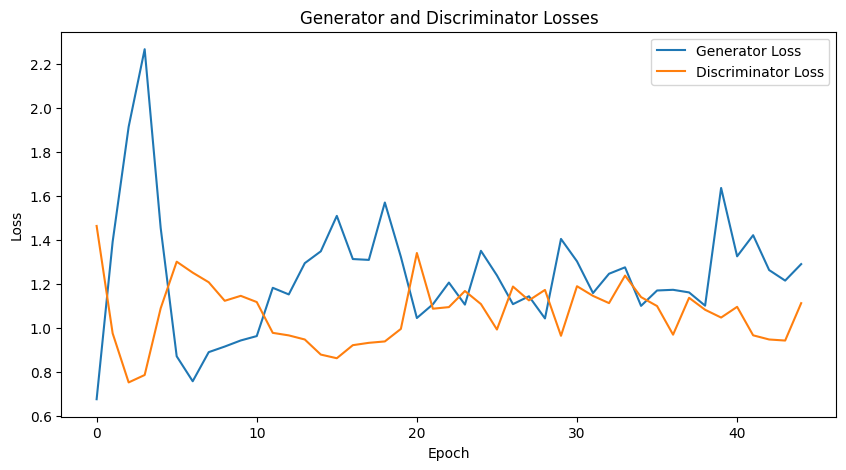

Epoch 46, Gen Loss: 1.5702, Disc Loss: 0.9743
Epoch 47, Gen Loss: 1.4665, Disc Loss: 1.1706
Epoch 48, Gen Loss: 1.5553, Disc Loss: 0.8801
Epoch 49, Gen Loss: 1.3299, Disc Loss: 1.0086
Epoch 50, Gen Loss: 1.5826, Disc Loss: 1.0198


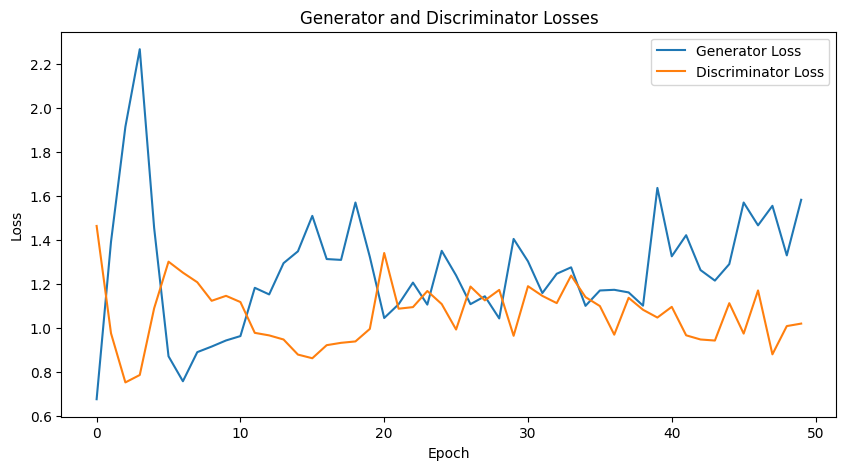

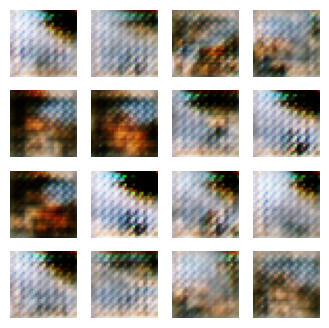

Epoch 51, Gen Loss: 1.2753, Disc Loss: 0.9068
Epoch 52, Gen Loss: 1.3054, Disc Loss: 1.2753
Epoch 53, Gen Loss: 1.3166, Disc Loss: 1.1095
Epoch 54, Gen Loss: 1.1719, Disc Loss: 1.0038
Epoch 55, Gen Loss: 1.3440, Disc Loss: 1.0009


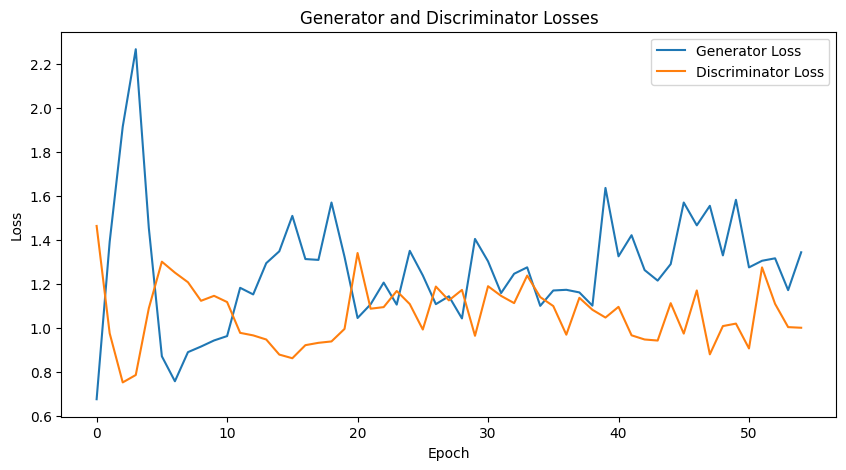

Epoch 56, Gen Loss: 1.3452, Disc Loss: 0.9598
Epoch 57, Gen Loss: 1.1563, Disc Loss: 1.0595
Epoch 58, Gen Loss: 1.1999, Disc Loss: 1.1148
Epoch 59, Gen Loss: 1.4852, Disc Loss: 1.0425
Epoch 60, Gen Loss: 1.3466, Disc Loss: 1.0420


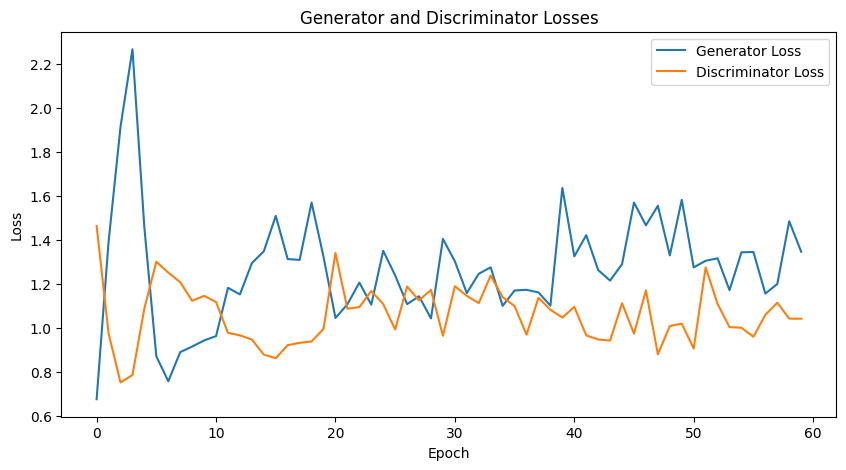

Epoch 61, Gen Loss: 1.2363, Disc Loss: 1.1460
Epoch 62, Gen Loss: 1.1938, Disc Loss: 1.0166
Epoch 63, Gen Loss: 1.5660, Disc Loss: 1.1954
Epoch 64, Gen Loss: 1.1137, Disc Loss: 1.0896
Epoch 65, Gen Loss: 1.2949, Disc Loss: 1.0346


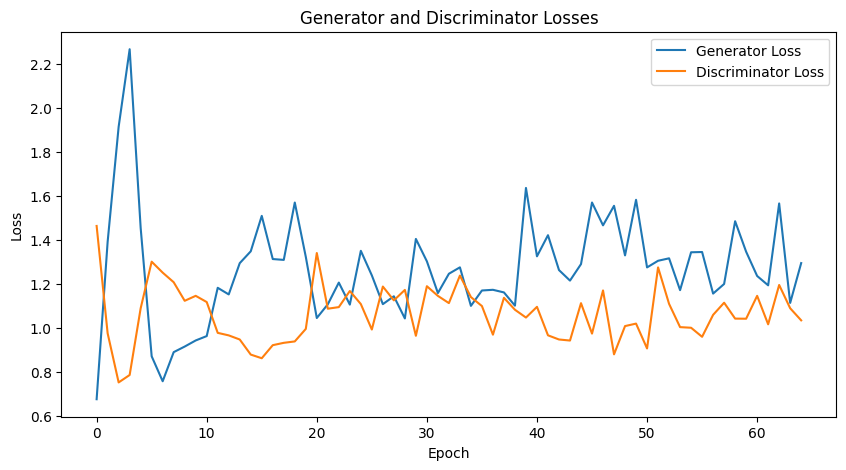

Epoch 66, Gen Loss: 1.2001, Disc Loss: 1.2185
Epoch 67, Gen Loss: 1.5412, Disc Loss: 1.0376
Epoch 68, Gen Loss: 1.4574, Disc Loss: 0.9489
Epoch 69, Gen Loss: 1.3425, Disc Loss: 0.9639
Epoch 70, Gen Loss: 1.2242, Disc Loss: 1.3139


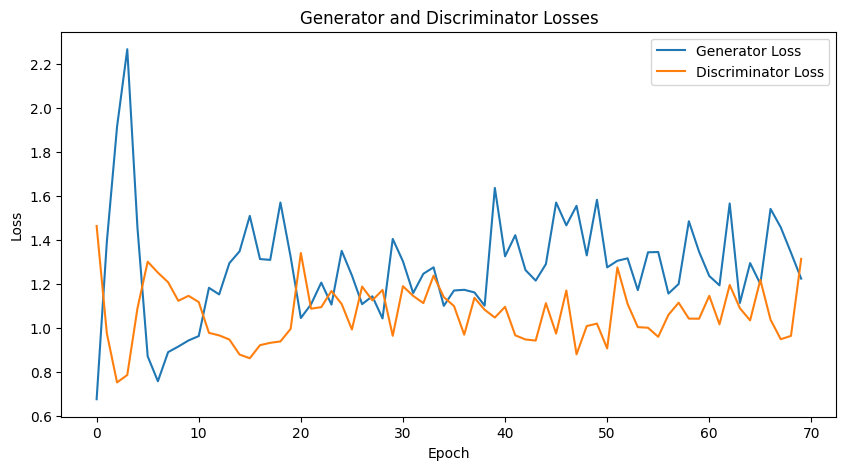

Epoch 71, Gen Loss: 1.3265, Disc Loss: 0.9277
Epoch 72, Gen Loss: 1.6397, Disc Loss: 0.8544
Epoch 73, Gen Loss: 1.4471, Disc Loss: 1.0649
Epoch 74, Gen Loss: 1.5093, Disc Loss: 0.9963
Epoch 75, Gen Loss: 1.2691, Disc Loss: 1.0891


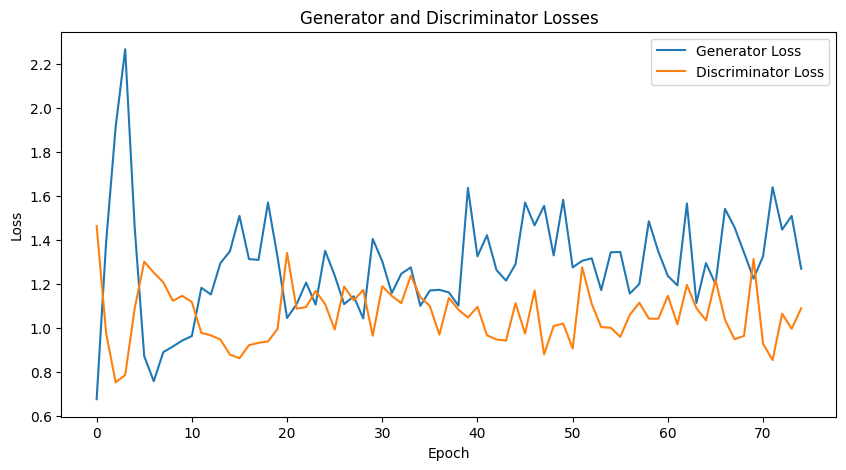

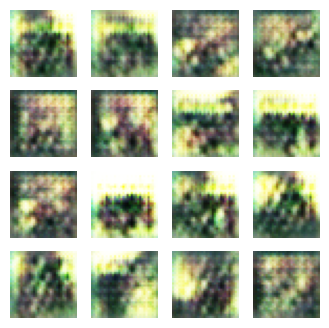

Epoch 76, Gen Loss: 1.3094, Disc Loss: 1.1061
Epoch 77, Gen Loss: 1.4185, Disc Loss: 0.9742
Epoch 78, Gen Loss: 1.3368, Disc Loss: 0.9249
Epoch 79, Gen Loss: 1.7419, Disc Loss: 0.9936
Epoch 80, Gen Loss: 1.7316, Disc Loss: 1.2131


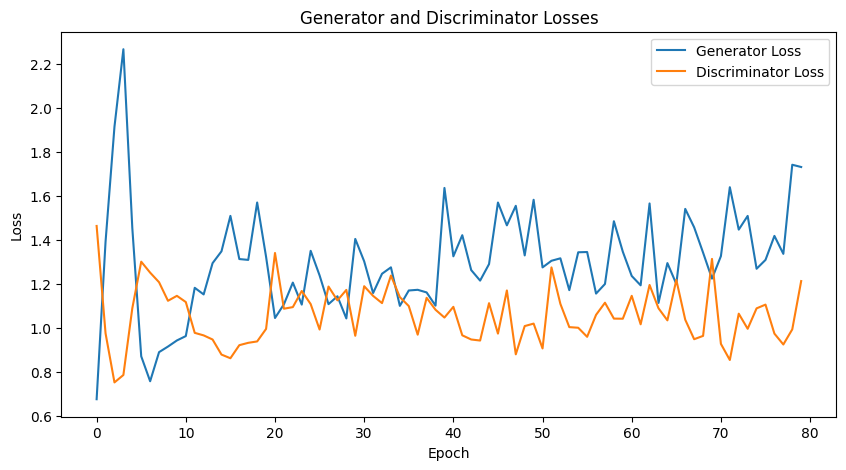

Epoch 81, Gen Loss: 1.5746, Disc Loss: 1.0114
Epoch 82, Gen Loss: 1.7510, Disc Loss: 0.8036
Epoch 83, Gen Loss: 1.4004, Disc Loss: 1.0141
Epoch 84, Gen Loss: 1.4936, Disc Loss: 0.8900
Epoch 85, Gen Loss: 1.4578, Disc Loss: 1.0165


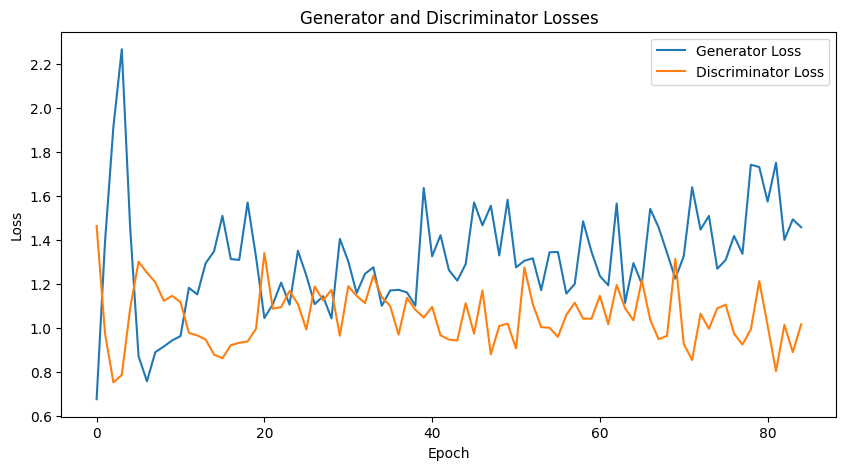

Epoch 86, Gen Loss: 1.3828, Disc Loss: 0.9500
Epoch 87, Gen Loss: 1.5326, Disc Loss: 0.9638
Epoch 88, Gen Loss: 1.4165, Disc Loss: 0.9706
Epoch 89, Gen Loss: 1.4703, Disc Loss: 1.0755
Epoch 90, Gen Loss: 1.4259, Disc Loss: 1.0446


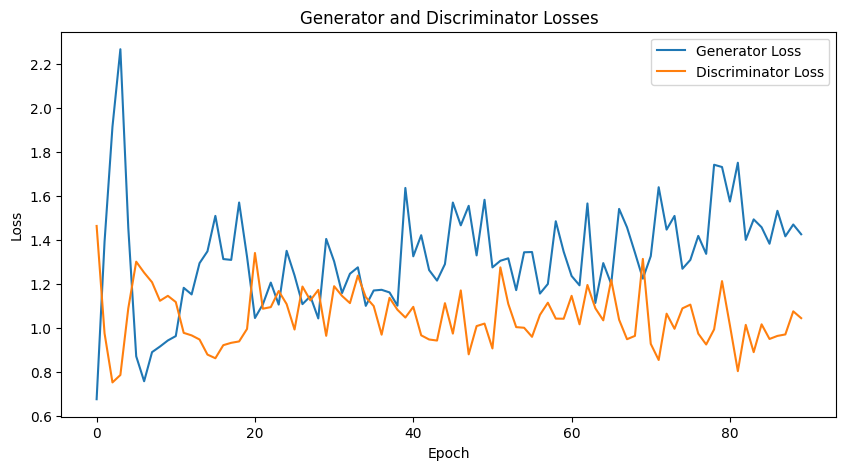

Epoch 91, Gen Loss: 1.2504, Disc Loss: 1.1693
Epoch 92, Gen Loss: 1.2955, Disc Loss: 1.0108
Epoch 93, Gen Loss: 1.4862, Disc Loss: 0.9926
Epoch 94, Gen Loss: 1.3333, Disc Loss: 1.1388
Epoch 95, Gen Loss: 1.2284, Disc Loss: 1.0615


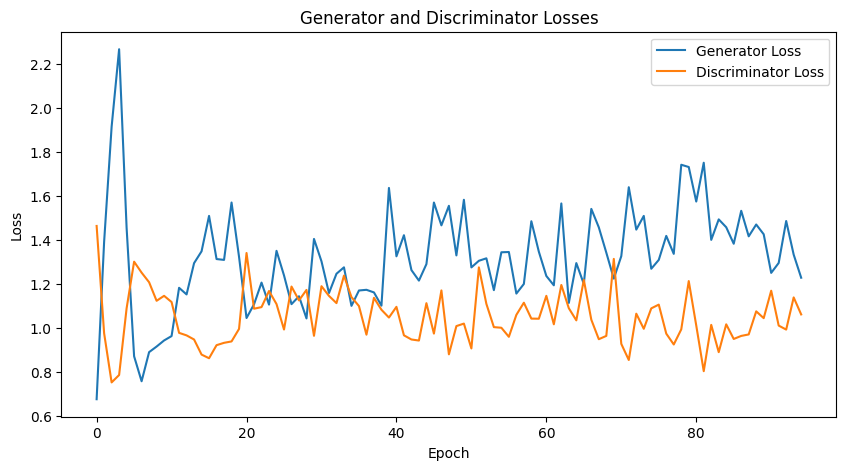

Epoch 96, Gen Loss: 1.2340, Disc Loss: 1.1772
Epoch 97, Gen Loss: 1.3825, Disc Loss: 0.9501
Epoch 98, Gen Loss: 1.7434, Disc Loss: 0.9495
Epoch 99, Gen Loss: 1.5230, Disc Loss: 0.9870
Epoch 100, Gen Loss: 1.8564, Disc Loss: 0.8755


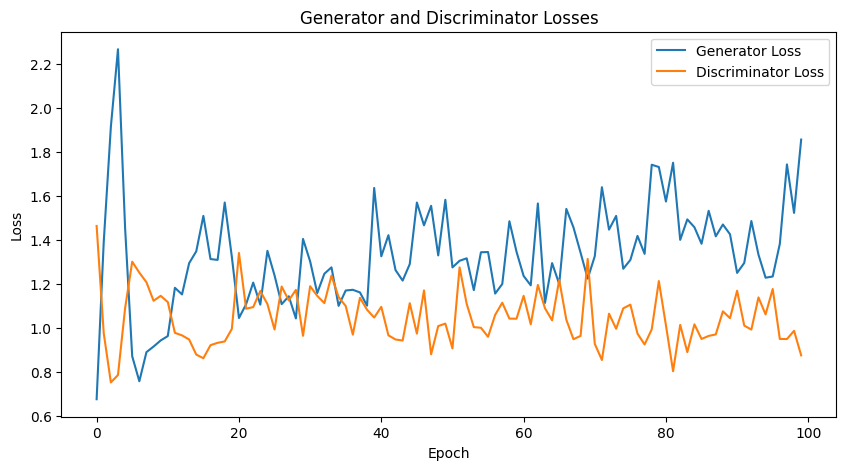

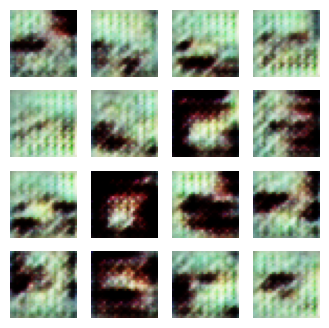

In [4]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Enable Mixed Precision for Faster Training
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Load and preprocess CIFAR-10 dataset
(train_images, _), (_, _) = tf.keras.datasets.cifar10.load_data()
train_images = train_images.astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

BUFFER_SIZE = 50000
BATCH_SIZE = 512
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = tf.data.Dataset.from_tensor_slices(train_images) \
    .shuffle(BUFFER_SIZE) \
    .batch(BATCH_SIZE) \
    .prefetch(AUTOTUNE)

# Generator model
def make_generator_model():
    inputs = tf.keras.Input(shape=(100,))
    x = layers.Dense(8*8*256, use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Reshape((8, 8, 256))(x)
    x = layers.Conv2DTranspose(256, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    outputs = layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Discriminator model
def make_discriminator_model():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same')(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Flatten()(x)
    outputs = layers.Dense(1)(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Optimizers
with tf.device('/GPU:0'):
    generator = make_generator_model()
    discriminator = make_discriminator_model()
    generator_optimizer = tf.keras.optimizers.Adam(1e-4)
    discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Function to plot generated images
def plot_images(epoch, test_input):
    predictions = generator(test_input, training=False).numpy()
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i] * 127.5 + 127.5).astype('uint8'))
        plt.axis('off')
    plt.show()
    plt.close()

# Training function
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Training loop with loss plotting
def train(dataset, epochs):
    test_input = tf.random.normal([16, 100])
    gen_losses = []
    disc_losses = []

    for epoch in range(epochs):
        epoch_gen_loss = 0
        epoch_disc_loss = 0
        num_batches = 0

        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            epoch_gen_loss += g_loss
            epoch_disc_loss += d_loss
            num_batches += 1

        # Calculate average losses for this epoch
        epoch_gen_loss = epoch_gen_loss / num_batches
        epoch_disc_loss = epoch_disc_loss / num_batches
        gen_losses.append(float(epoch_gen_loss))
        disc_losses.append(float(epoch_disc_loss))

        # Print losses every epoch
        print(f'Epoch {epoch+1}, Gen Loss: {epoch_gen_loss:.4f}, Disc Loss: {epoch_disc_loss:.4f}')

        # Plot losses every 5 epochs
        if (epoch + 1) % 5 == 0:
            plt.figure(figsize=(10, 5))
            plt.plot(gen_losses, label='Generator Loss')
            plt.plot(disc_losses, label='Discriminator Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title('Generator and Discriminator Losses')
            plt.legend()
            plt.show()
            plt.close()

        # Plot generated images every 25 epochs
        if (epoch + 1) % 25 == 0:
            plot_images(epoch + 1, test_input)

# Run the training
with tf.device('/GPU:0'):
    train(train_dataset, epochs=100)

## 📌 Conclusion

### **1️⃣ Loss Analysis**
- The **generator loss is increasing** while the **discriminator loss is decreasing**.
- This suggests that the **discriminator is getting better at distinguishing real and fake images**, making it harder for the generator to improve.
- Ideally, both losses should **stabilize** instead of diverging.

### **2️⃣ Generated Images Evaluation**
- The images are **blurry and lack clear object structures**.
- There is a **checkerboard artifact** (grid-like patterns), which could be caused by:
  - **Large kernel sizes** in `Conv2DTranspose`.
  - **Insufficient training time** (100 epochs may not be enough).
  - **Mode collapse** where the generator produces limited variations.


# Updates in the GAN Architecture

This update introduces several key improvements for better training stability, efficiency, and performance.

## Key Updates
### 1️⃣ Mixed Precision Training
- The model now uses `float16` mixed precision, which reduces memory usage and speeds up training on the GPU.
- This ensures better GPU utilization, making training faster and more efficient.

### 2️⃣ Label Smoothing for Stability
- Instead of hard labels (`1` for real, `0` for fake), we now use smoother labels:
  - Real labels: `0.9`
  - Fake labels: `0.1`
- This prevents the discriminator from becoming too confident, allowing the generator to learn more effectively.

### 3️⃣ Gradient Penalty Regularization
- Introduced gradient penalty to stabilize training.
- Helps prevent mode collapse, where the generator produces repetitive outputs instead of diverse images.
- Ensures smoother convergence over long training sessions.

### 4️⃣ Dynamic Batch Size Handling
- The training function now automatically adapts to batch sizes.
- Prevents shape mismatches and ensures that training runs smoothly, even if dataset sizes vary.

### 5️⃣ Improved Loss Tracking and Visualization
- The script now prints losses at regular intervals, making it easier to debug training.
- Plots generator and discriminator loss curves every few epochs to monitor stability.
- This allows better tracking of progress and easier detection of potential issues.

### 6️⃣ Refined Image Generation Process
- Final image scaling is properly handled, preventing artifacts.
- Generated images now have better contrast and visual clarity.
- Helps in interpreting model progress more effectively.

---


Starting epoch 1/300
  Step 0: Gen Loss: 0.6828, Disc Loss: 7.2136
Starting epoch 2/300
  Step 0: Gen Loss: 0.3676, Disc Loss: 7.1766
Starting epoch 3/300
  Step 0: Gen Loss: 0.2799, Disc Loss: 7.0907
Starting epoch 4/300
  Step 0: Gen Loss: 0.1991, Disc Loss: 7.3030
Starting epoch 5/300
  Step 0: Gen Loss: 0.1964, Disc Loss: 7.5444
Starting epoch 6/300
  Step 0: Gen Loss: 0.3183, Disc Loss: 7.4525
Starting epoch 7/300
  Step 0: Gen Loss: 0.6182, Disc Loss: 7.0746
Starting epoch 8/300
  Step 0: Gen Loss: 0.7146, Disc Loss: 6.9540
Starting epoch 9/300
  Step 0: Gen Loss: 0.7588, Disc Loss: 6.4706
Starting epoch 10/300
  Step 0: Gen Loss: 0.8417, Disc Loss: 6.3809
Starting epoch 11/300
  Step 0: Gen Loss: 0.7457, Disc Loss: 5.7630
Starting epoch 12/300
  Step 0: Gen Loss: 0.5661, Disc Loss: 5.4645
Starting epoch 13/300
  Step 0: Gen Loss: 0.4949, Disc Loss: 5.2419
Starting epoch 14/300
  Step 0: Gen Loss: 0.4501, Disc Loss: 4.5703
Starting epoch 15/300
  Step 0: Gen Loss: 0.3863, Disc Lo

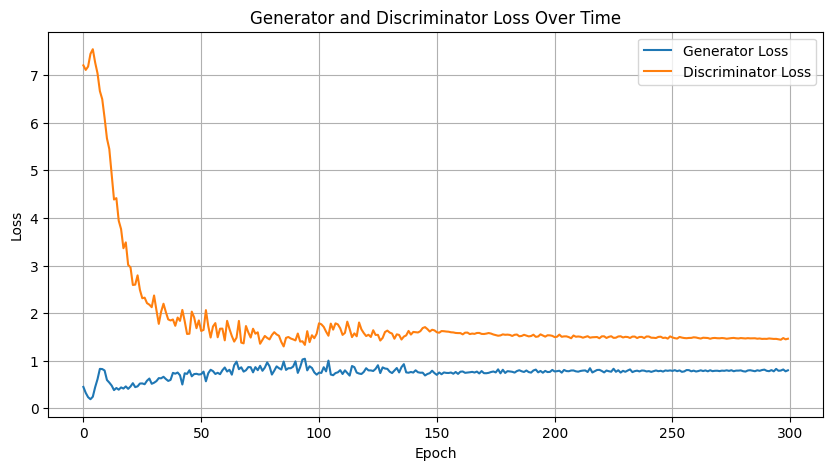

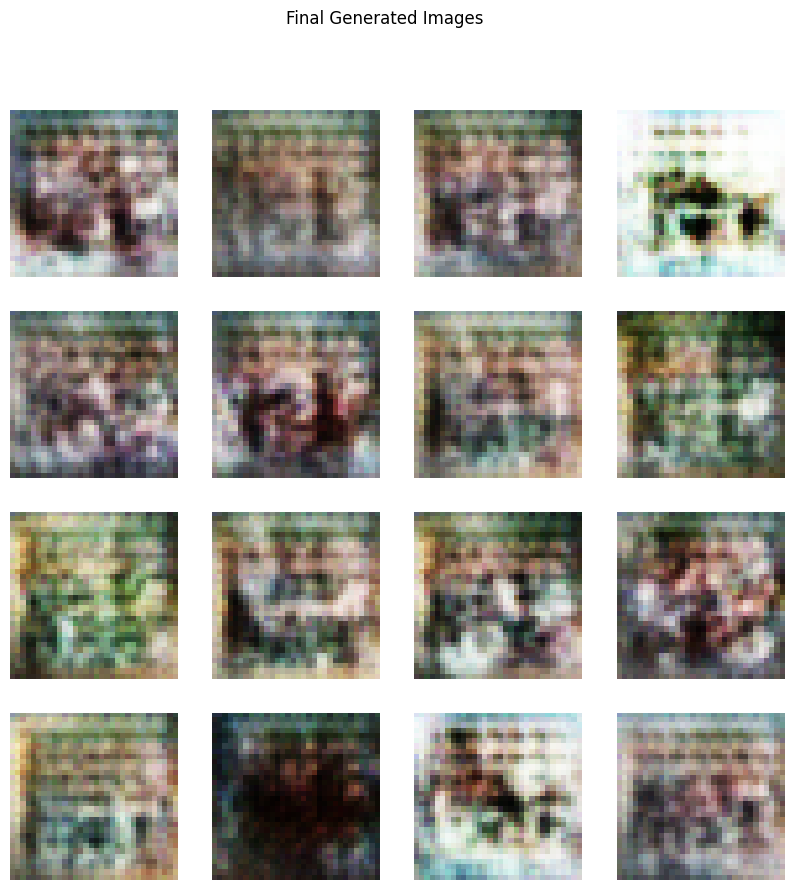

In [9]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Enable Mixed Precision for Faster Training
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Load and preprocess CIFAR-10 dataset
(train_images, _), (_, _) = tf.keras.datasets.cifar10.load_data()
train_images = train_images.astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

BUFFER_SIZE = 50000
BATCH_SIZE = 512
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = tf.data.Dataset.from_tensor_slices(train_images) \
    .shuffle(BUFFER_SIZE) \
    .batch(BATCH_SIZE) \
    .prefetch(AUTOTUNE)

# Create directory for saving images
os.makedirs("generated_images", exist_ok=True)

# Generator model
def make_generator_model():
    inputs = tf.keras.Input(shape=(100,))
    x = layers.Dense(8*8*256, use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Reshape((8, 8, 256))(x)
    x = layers.Conv2DTranspose(256, (5, 5), strides=(1, 1), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    x = layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU()(x)

    outputs = layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Discriminator model
def make_discriminator_model():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same')(inputs)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Flatten()(x)
    outputs = layers.Dense(1)(x)

    model = tf.keras.Model(inputs, outputs)
    return model

# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) * 0.9, real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output) * 0.1, fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Gradient penalty function
def gradient_penalty(discriminator, real_images, fake_images):
    batch_size = tf.shape(real_images)[0]
    alpha = tf.random.uniform([batch_size, 1, 1, 1], 0., 1.)
    interpolated = real_images + alpha * (fake_images - real_images)

    with tf.GradientTape() as gp_tape:
        gp_tape.watch(interpolated)
        pred = discriminator(interpolated, training=True)

    grads = gp_tape.gradient(pred, interpolated)
    norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
    gp = tf.reduce_mean((norm - 1.0) ** 2)
    return gp

# Optimizers
with tf.device('/GPU:0'):
    generator = make_generator_model()
    discriminator = make_discriminator_model()
    generator_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.5)
    discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.5)

# Function to save generated images
def save_images(epoch, test_input):
    generated_images = generator(test_input, training=False)

    fig, axs = plt.subplots(4, 4, figsize=(6, 6))
    for i in range(16):
        axs[i // 4, i % 4].imshow((generated_images[i] * 127.5 + 127.5).numpy().astype(np.uint8))
        axs[i // 4, i % 4].axis('off')

    plt.savefig(f"generated_images/epoch_{epoch:03d}.png")
    plt.close()

# Training step
@tf.function
def train_step(images):
    batch_size = tf.shape(images)[0]
    noise = tf.random.normal([batch_size, 100], dtype=tf.float16)
    gp_weight = 10.0

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        # Cast both to float32 for the discriminator
        real_images = tf.cast(images, tf.float32)
        fake_images = tf.cast(generated_images, tf.float32)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(fake_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        gp = gradient_penalty(discriminator, real_images, fake_images)
        disc_loss += gp_weight * gp

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Training loop with image saving
def train(dataset, epochs):
    test_input = tf.random.normal([16, 100])
    gen_losses = []
    disc_losses = []

    for epoch in range(epochs):
        print(f"Starting epoch {epoch + 1}/{epochs}")
        epoch_gen_losses = []
        epoch_disc_losses = []

        for step, image_batch in enumerate(dataset):
            gen_loss, disc_loss = train_step(image_batch)
            epoch_gen_losses.append(float(gen_loss))
            epoch_disc_losses.append(float(disc_loss))

            if step % 100 == 0:
                print(f"  Step {step}: Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}")

        # Store average losses for each epoch
        gen_losses.append(np.mean(epoch_gen_losses))
        disc_losses.append(np.mean(epoch_disc_losses))

        # Save generated images every 10 epochs
        if (epoch + 1) % 10 == 0:
            save_images(epoch + 1, test_input)

    # Plot losses
    plt.figure(figsize=(10, 5))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Generator and Discriminator Loss Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the training
with tf.device('/GPU:0'):
    train(train_dataset, epochs=300)


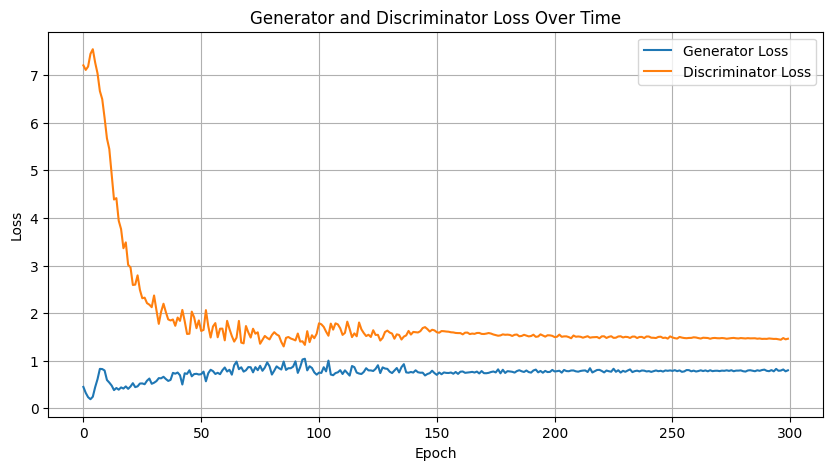

In [11]:
    plt.figure(figsize=(10, 5))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Generator and Discriminator Loss Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

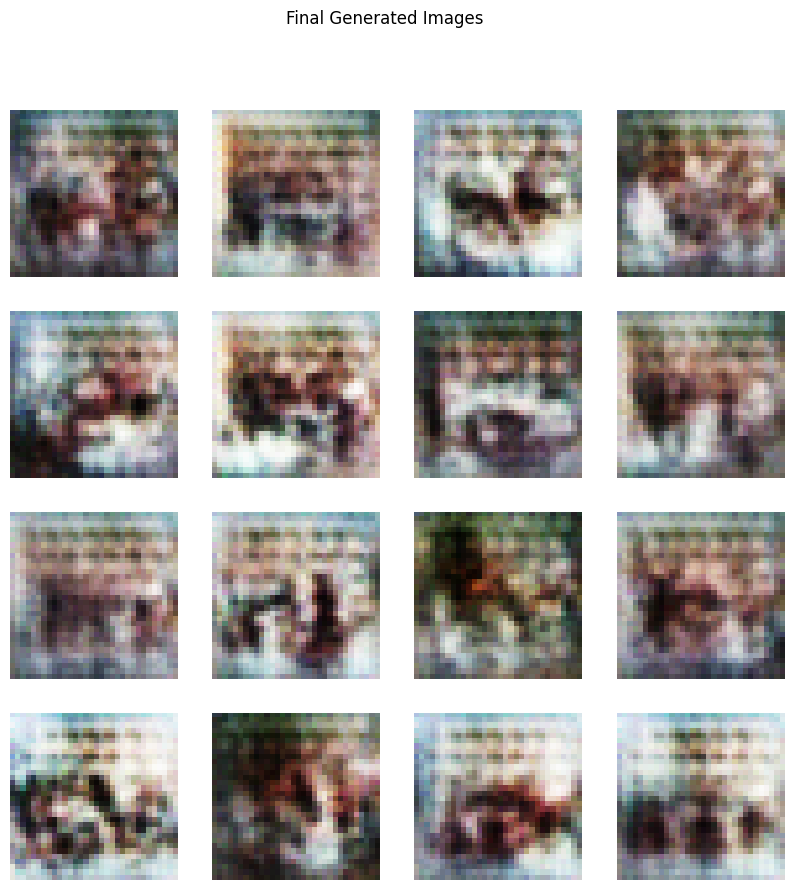

In [14]:
    test_noise = tf.random.normal([16, 100])
    generated_images = generator(test_noise, training=False)
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        # Convert from [-1, 1] range to [0, 255]
        img = ((generated_images[i] + 1) * 127.5).numpy().astype(np.uint8)
        plt.imshow(img)
        plt.axis('off')

    plt.suptitle('Final Generated Images')
    plt.show()

# Conclusion

## 1. Loss Analysis
- The **discriminator loss decreases sharply** in the early epochs and then stabilizes around **1.5**.
- The **generator loss starts low and slowly increases**, stabilizing around **0.8 - 1.0**.
- This suggests that the **training has reached equilibrium**, where the generator is improving without being completely overpowered by the discriminator.

## 2. Generated Image Evaluation
- The generated images **show recognizable object structures**, an improvement from earlier blurry outputs.
- However, there are still **visible artifacts** and **checkerboard patterns**, likely due to **transposed convolution artifacts**.
- The images still **lack fine details and sharpness**, indicating that the generator needs further refinement.

## 3. Final Thoughts
- The **GAN has learned to generate rough object shapes**, showing meaningful progress.
- **Training has stabilized**, but **generated images still require improvements** in detail and sharpness.
- With additional **hyperparameter tuning and extended training**, the model can achieve **higher-quality outputs**.
